In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score, GridSearchCV
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso , LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from sklearn.preprocessing import OneHotEncoder
import joblib
import streamlit as st


In [2]:
data = pd.read_excel('C:/Users/admin/Desktop/Zomato Analytics/Zomata (1).xlsx',sheet_name='Sheet1')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   RestaurantID          9551 non-null   int64         
 1   RestaurantName        9551 non-null   object        
 2   CountryCode           9551 non-null   int64         
 3   Country name          9551 non-null   object        
 4   City                  9551 non-null   object        
 5   Address               9551 non-null   object        
 6   Locality              9551 non-null   object        
 7   LocalityVerbose       9551 non-null   object        
 8   Longitude             9551 non-null   float64       
 9   Latitude              9551 non-null   float64       
 10  Cuisines              9542 non-null   object        
 11  Currency              9551 non-null   object        
 12  Has_Table_booking     9551 non-null   object        
 13  Has_Online_deliver

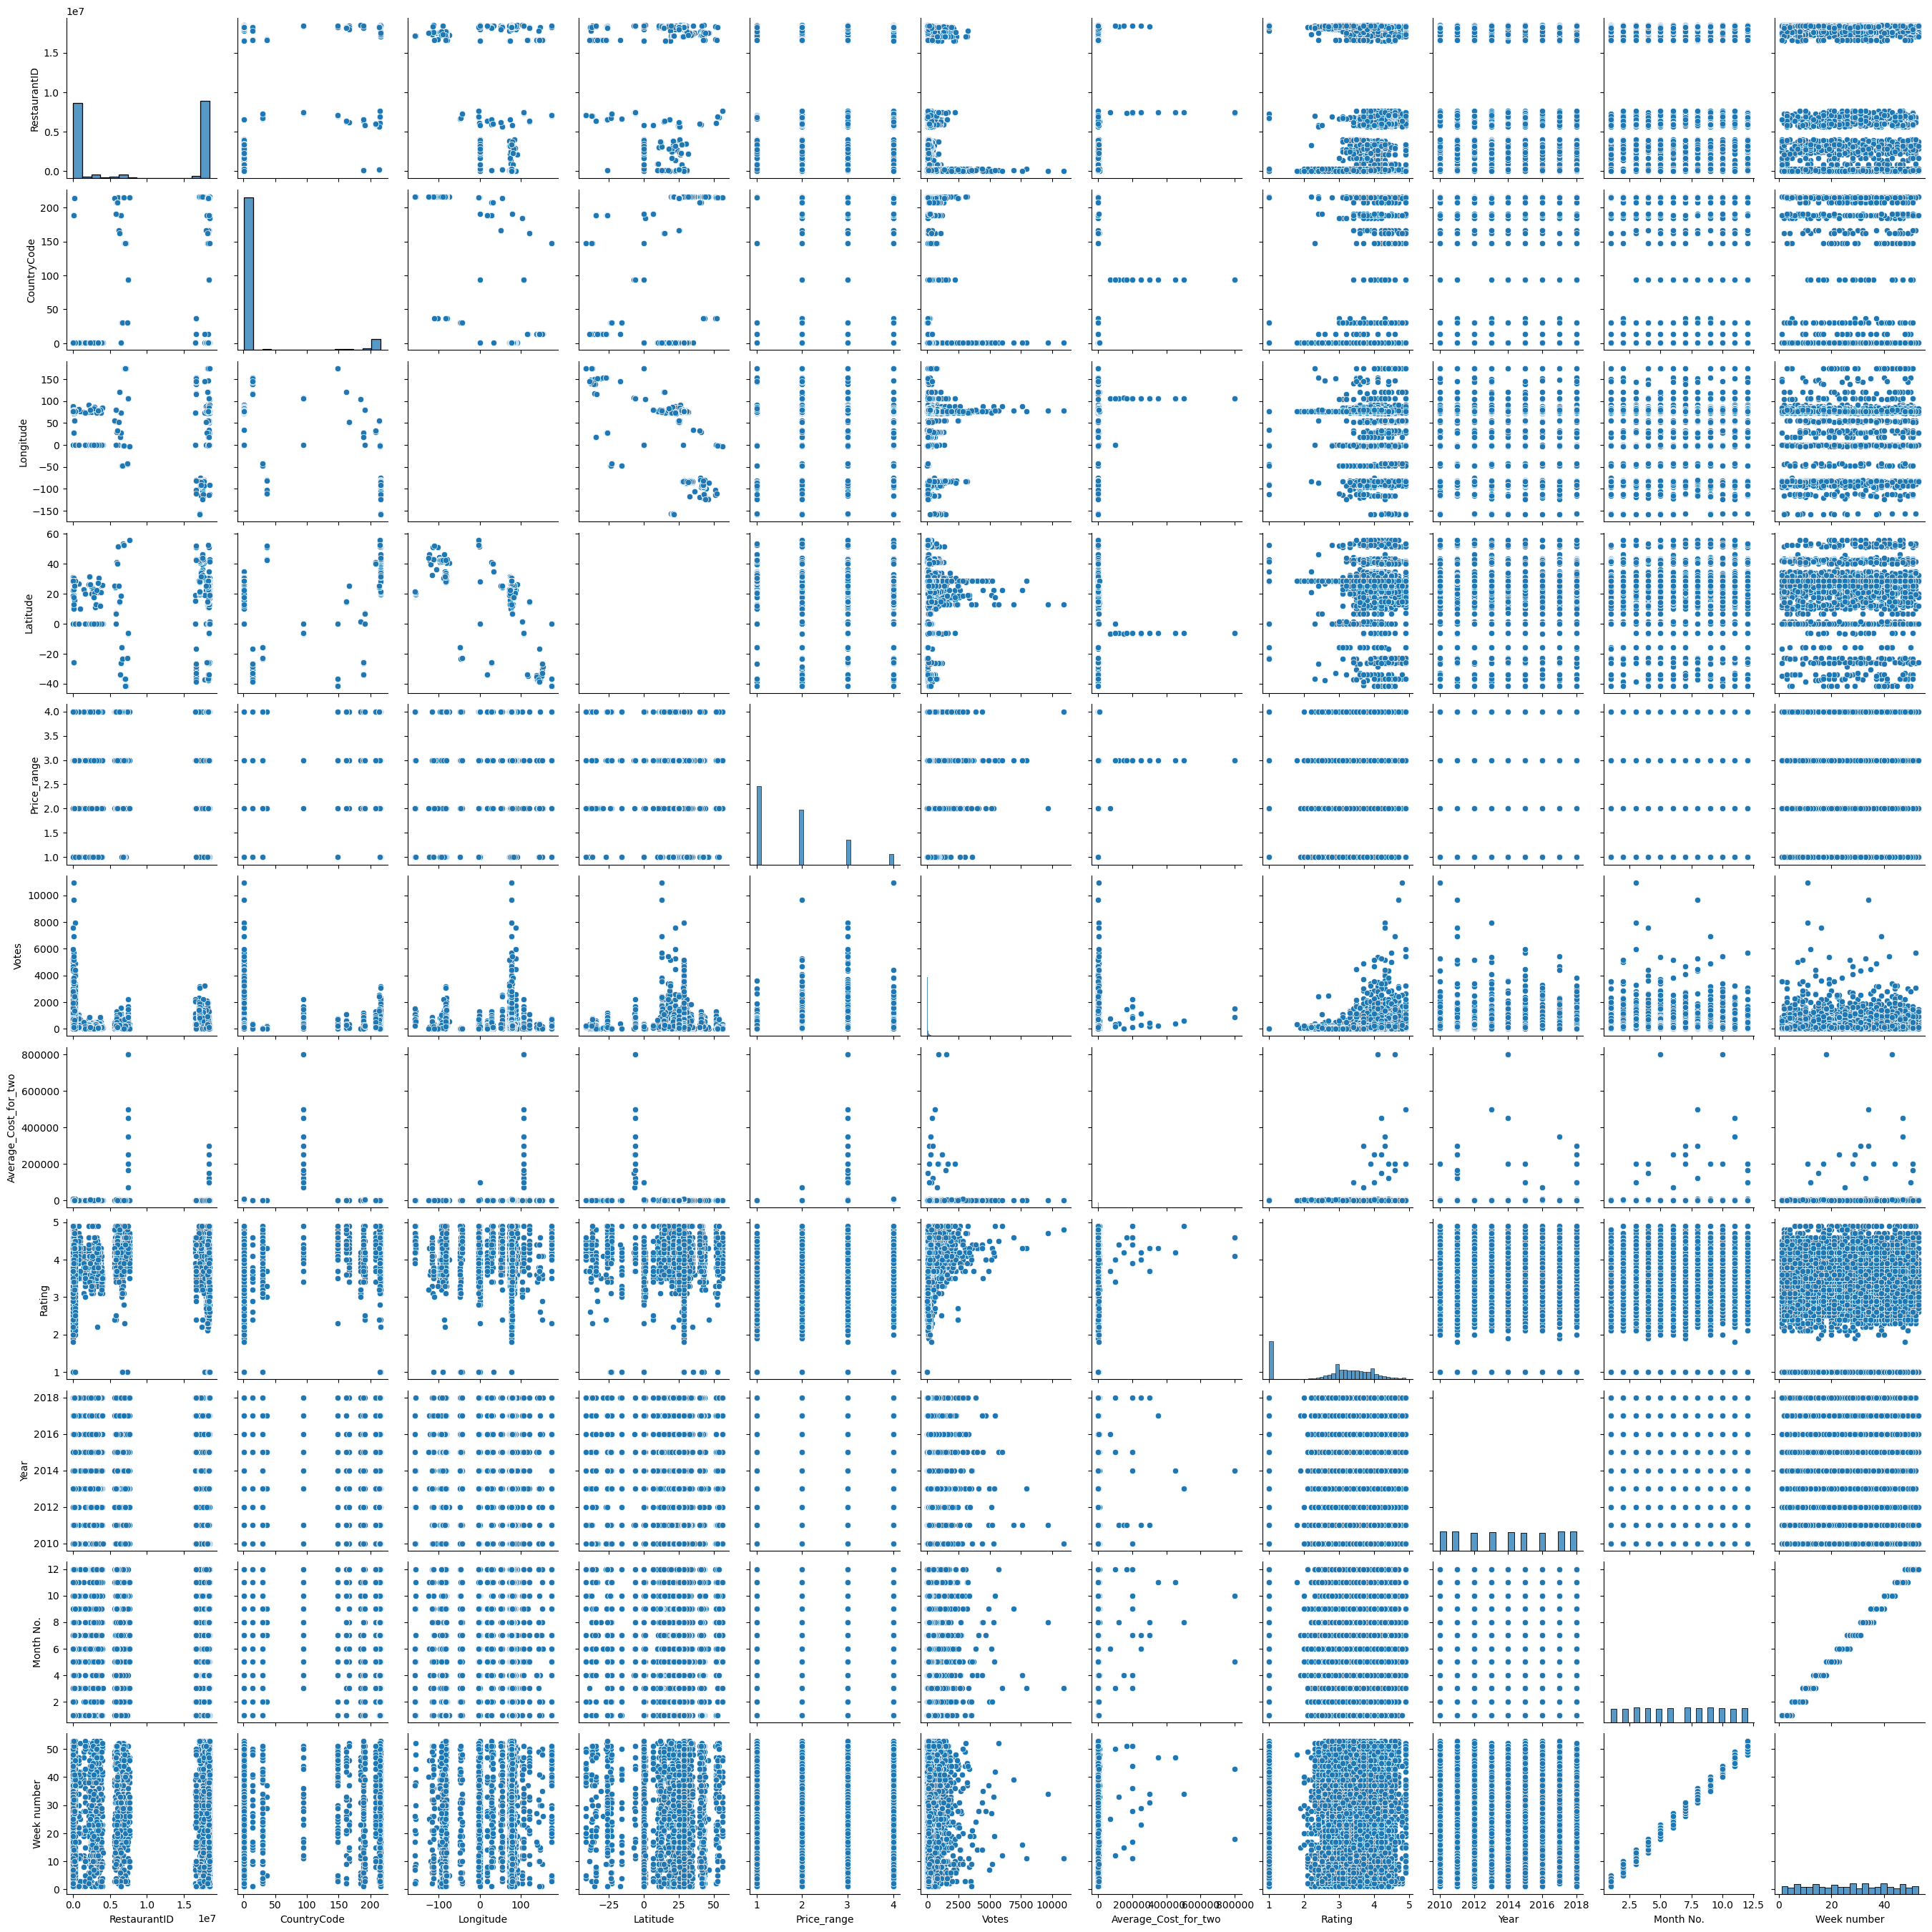

In [4]:

sns.pairplot(data)
plt.show()

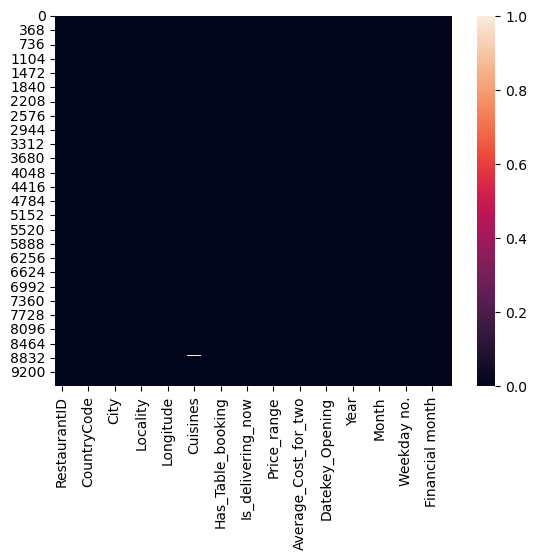

In [5]:
sns.heatmap(data.isna())
plt.show()

In [6]:
data.count()

RestaurantID            9551
RestaurantName          9551
CountryCode             9551
Country name            9551
City                    9551
Address                 9551
Locality                9551
LocalityVerbose         9551
Longitude               9551
Latitude                9551
Cuisines                9542
Currency                9551
Has_Table_booking       9551
Has_Online_delivery     9551
Is_delivering_now       9551
Switch_to_order_menu    9551
Price_range             9551
Votes                   9551
Average_Cost_for_two    9551
Rating                  9551
Datekey_Opening         9551
Date                    9551
Year                    9551
Month No.               9551
Month                   9551
Quarter                 9551
Weekday no.             9551
Week number             9551
Financial month         9551
Financial Quarter       9551
dtype: int64

In [7]:
restaurant_counts = data.groupby(['City', 'Country name'])['RestaurantID'].count().reset_index()

# Rename the columns for clarity
restaurant_counts.columns = ['City', 'Country', 'Number of Restaurants']

# Display the result
print(restaurant_counts)

                City               Country  Number of Restaurants
0          Abu Dhabi  United Arab Emirates                     20
1               Agra                 India                     20
2          Ahmedabad                 India                     21
3             Albany         United States                     20
4          Allahabad                 India                     20
..               ...                   ...                    ...
136          Weirton         United States                      1
137  Wellington City           New Zealand                     20
138   Winchester Bay         United States                      1
139          Yorkton                Canada                      1
140        ÛÁstanbul                Turkey                     14

[141 rows x 3 columns]


In [8]:
# Group by Year and count the number of restaurants
yearly_counts = data.groupby('Year')['RestaurantID'].count().reset_index()
yearly_counts.columns = ['Year', 'Number of Restaurants']

# Group by Year and Quarter and count the number of restaurants
quarterly_counts = data.groupby(['Year', 'Quarter'])['RestaurantID'].count().reset_index()
quarterly_counts.columns = ['Year', 'Quarter', 'Number of Restaurants']

# Group by Year and Month and count the number of restaurants
monthly_counts = data.groupby(['Year', 'Month'])['RestaurantID'].count().reset_index()
monthly_counts.columns = ['Year', 'Month', 'Number of Restaurants']


C:\Users\admin\AppData\Local\Temp\ipykernel_5076\1414479638.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_counts, x='Year', y='Number of Restaurants', palette='viridis')


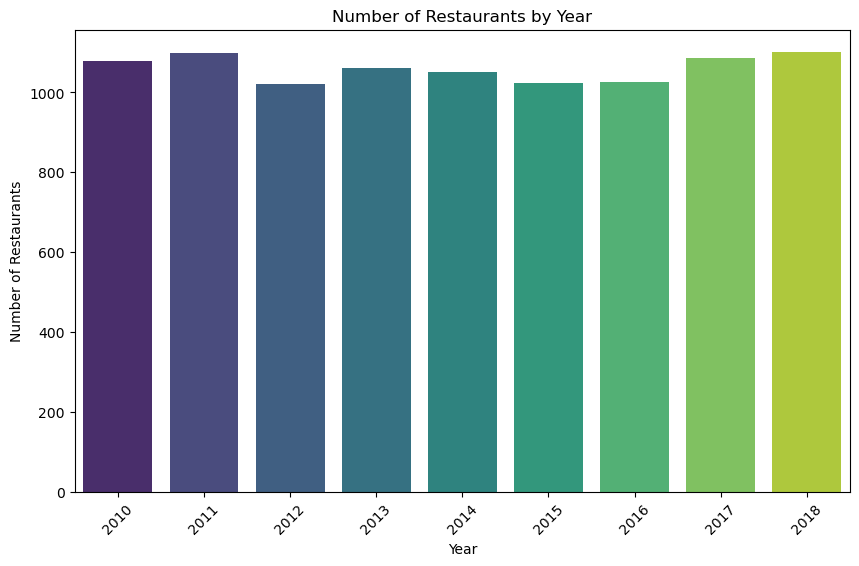

In [9]:
# Plot the number of restaurants by year
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_counts, x='Year', y='Number of Restaurants', palette='viridis')
plt.title('Number of Restaurants by Year')
plt.xlabel('Year')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

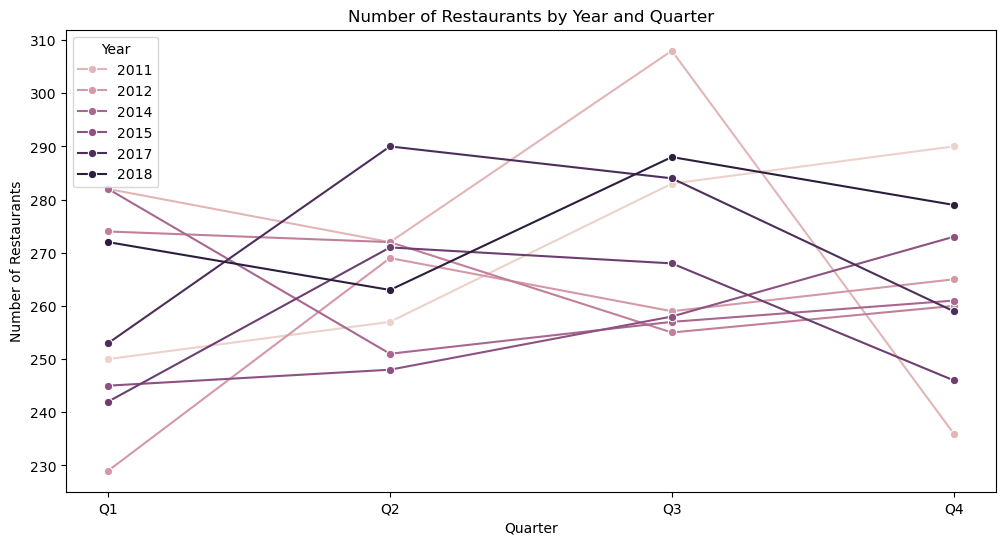

In [10]:
# Plot the number of restaurants by year and quarter
plt.figure(figsize=(12, 6))
sns.lineplot(data=quarterly_counts, x='Quarter', y='Number of Restaurants', hue='Year', marker='o')
plt.title('Number of Restaurants by Year and Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Restaurants')
plt.legend(title='Year')
plt.show()



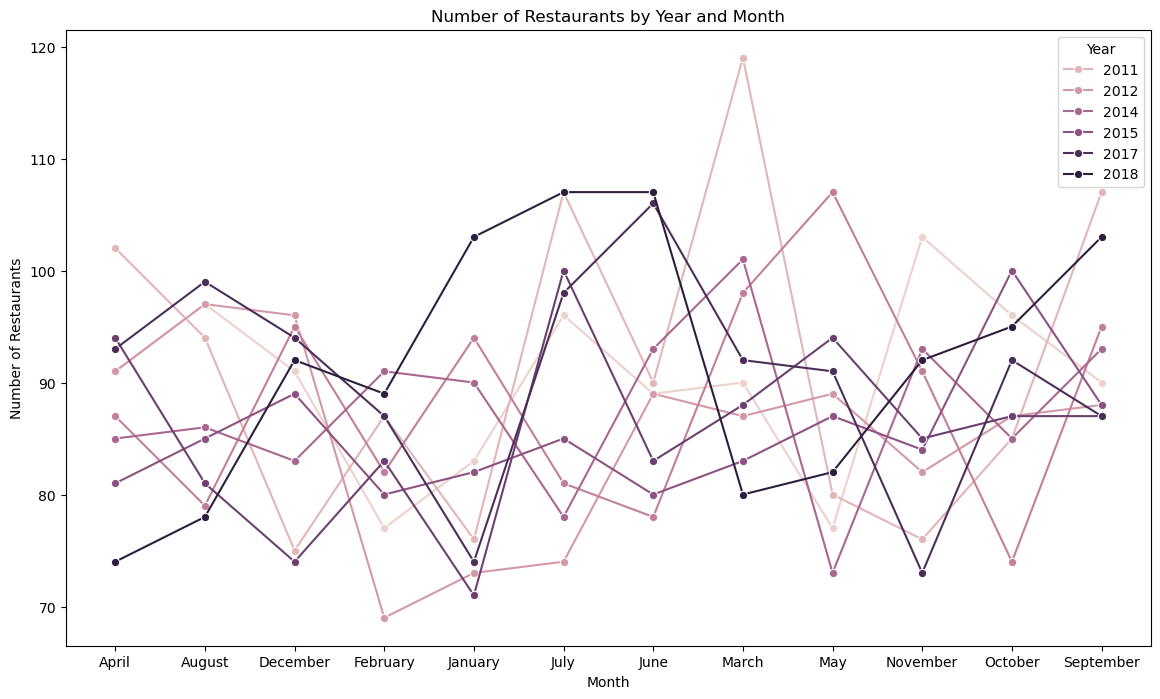

In [11]:
# Plot the number of restaurants by year and month
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_counts, x='Month', y='Number of Restaurants', hue='Year', marker='o')
plt.title('Number of Restaurants by Year and Month')
plt.xlabel('Month')
plt.ylabel('Number of Restaurants')
plt.legend(title='Year')
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_5076\1340794531.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rating_counts, x='Rating', y='Number of Restaurants', palette='viridis')


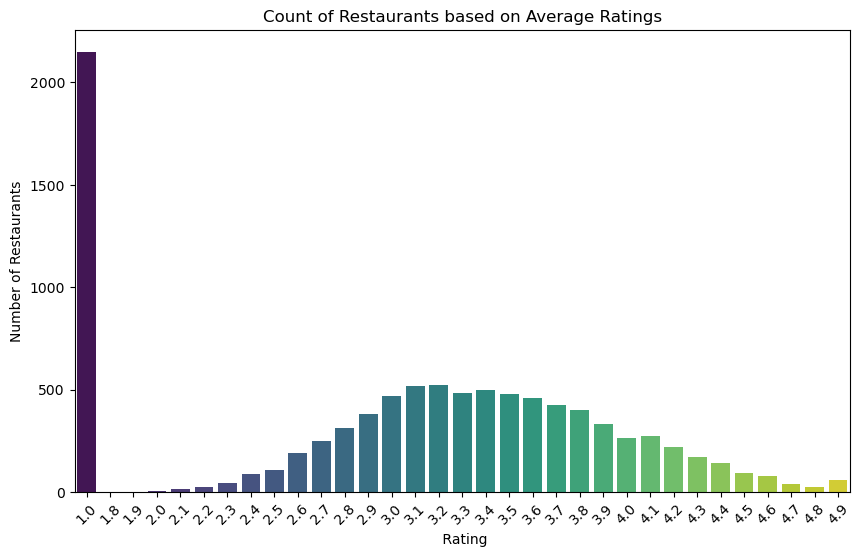

In [12]:
# Group by average ratings and count the number of restaurants
rating_counts = data.groupby('Rating')['RestaurantID'].count().reset_index()
rating_counts.columns = ['Rating', 'Number of Restaurants']

# Plot the count of restaurants based on average ratings
plt.figure(figsize=(10, 6))
sns.barplot(data=rating_counts, x='Rating', y='Number of Restaurants', palette='viridis')
plt.title('Count of Restaurants based on Average Ratings')
plt.xlabel(' Rating')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_5076\1851620701.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_bucket_counts, x='PriceBucket', y='Number of Restaurants', palette='viridis')


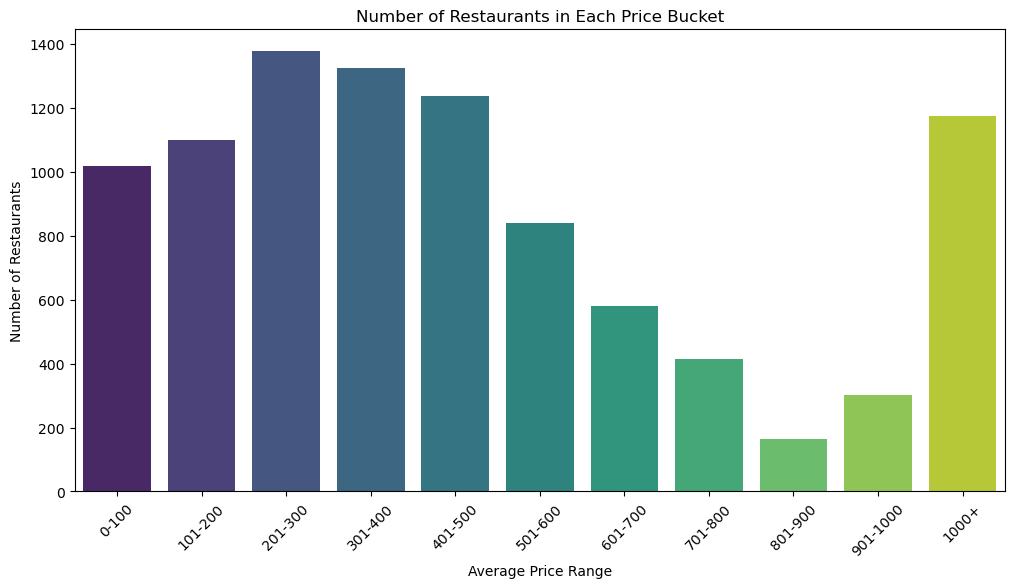

In [13]:
# Define the bins for the average price
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-800', '801-900', '901-1000', '1000+']

# Create the bins and count the number of restaurants in each bin
data['PriceBucket'] = pd.cut(data['Average_Cost_for_two'], bins=bins, labels=labels)
price_bucket_counts = data['PriceBucket'].value_counts().sort_index().reset_index()
price_bucket_counts.columns = ['PriceBucket', 'Number of Restaurants']

# Plot the number of restaurants in each price bucket
plt.figure(figsize=(12, 6))
sns.barplot(data=price_bucket_counts, x='PriceBucket', y='Number of Restaurants', palette='viridis')
plt.title('Number of Restaurants in Each Price Bucket')
plt.xlabel('Average Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()


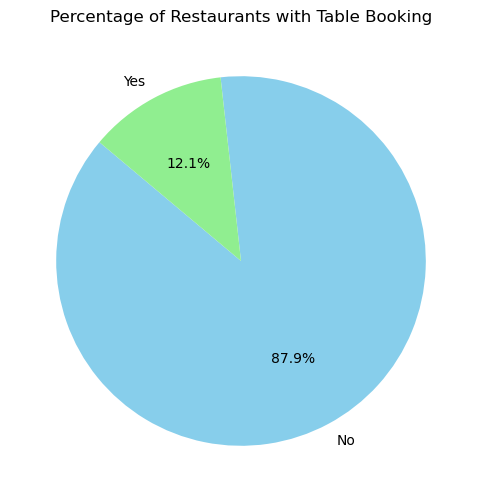

In [14]:
table_booking_counts = data['Has_Table_booking'].value_counts()

# Calculate the percentage for each category
table_booking_percentage = table_booking_counts / table_booking_counts.sum() * 100

# Convert to DataFrame for better visualization
table_booking_percentage = table_booking_percentage.reset_index()
table_booking_percentage.columns = ['Has_Table_booking', 'Percentage']

# Plot the percentage of restaurants based on "Has_Table_booking"
plt.figure(figsize=(8, 6))
plt.pie(table_booking_percentage['Percentage'], labels=table_booking_percentage['Has_Table_booking'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=140)
plt.title('Percentage of Restaurants with Table Booking')
plt.show()


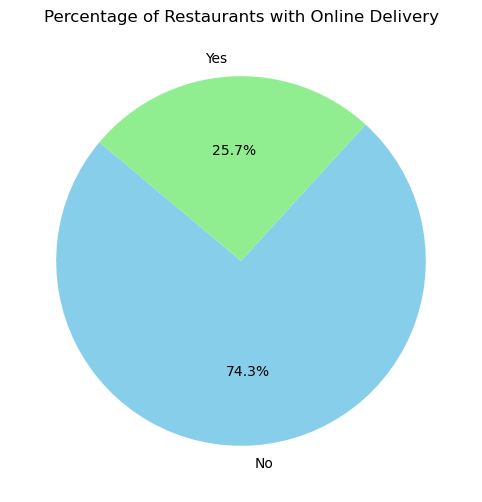

In [15]:
online_delivery_counts = data['Has_Online_delivery'].value_counts()

# Calculate the percentage for each category
online_delivery_percentage = online_delivery_counts / online_delivery_counts.sum() * 100

# Convert to DataFrame for better visualization
online_delivery_percentage = online_delivery_percentage.reset_index()
online_delivery_percentage.columns = ['Has_Online_delivery', 'Percentage']

# Plot the percentage of restaurants based on "Has_Online_delivery"
plt.figure(figsize=(8, 6))
plt.pie(online_delivery_percentage['Percentage'], labels=online_delivery_percentage['Has_Online_delivery'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=140)
plt.title('Percentage of Restaurants with Online Delivery')
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_5076\3205917333.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=cuisine_counts.index, x=cuisine_counts.values, palette='viridis')


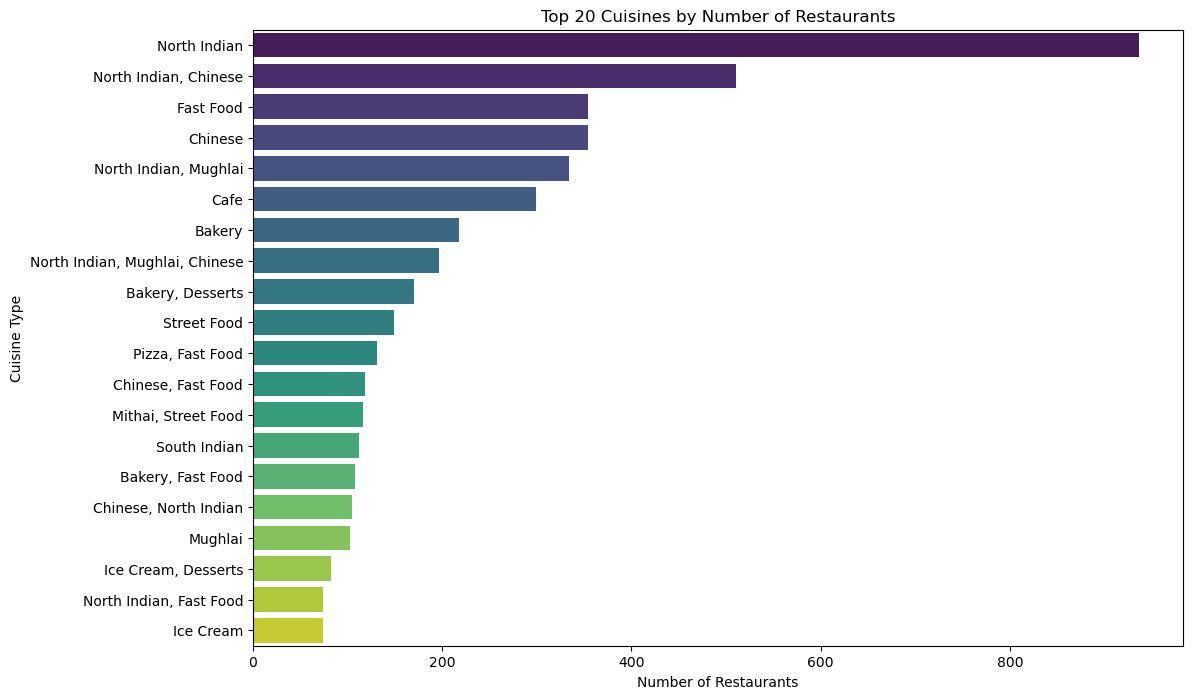

In [16]:
# Plot the count of restaurants by cuisine type
plt.figure(figsize=(12, 8))
cuisine_counts = data['Cuisines'].value_counts().head(20)  # Display top 20 cuisines for readability
sns.barplot(y=cuisine_counts.index, x=cuisine_counts.values, palette='viridis')
plt.title('Top 20 Cuisines by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Type')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_5076\3239157293.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=city_counts.index, x=city_counts.values, palette='viridis')


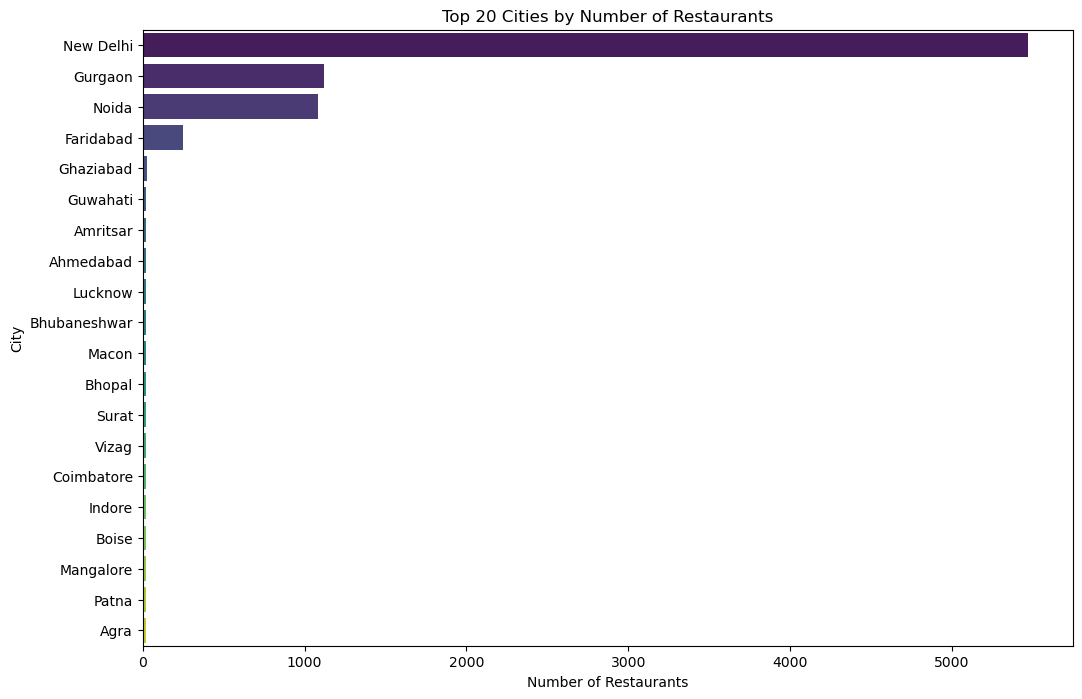

In [17]:
# Plot the count of restaurants by city
plt.figure(figsize=(12, 8))
city_counts = data['City'].value_counts().head(20)  # Display top 20 cities for readability
sns.barplot(y=city_counts.index, x=city_counts.values, palette='viridis')
plt.title('Top 20 Cities by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

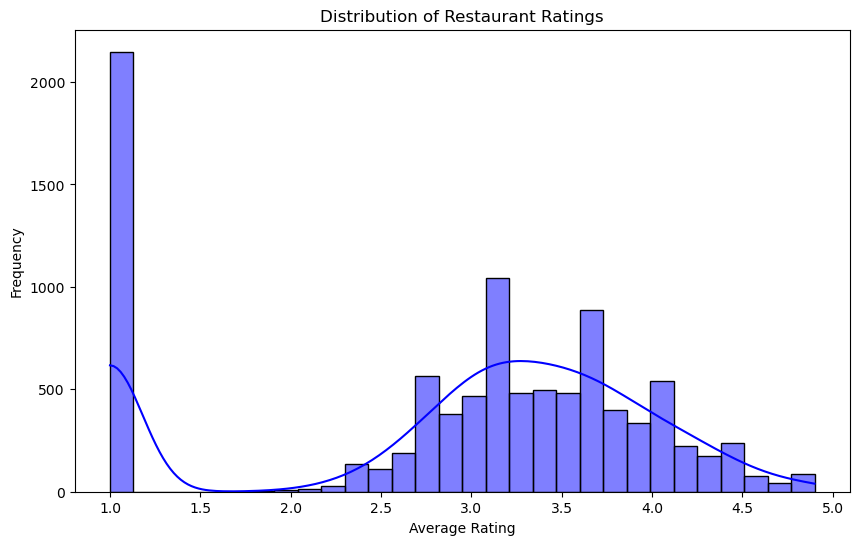

In [18]:
# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=30, kde=True, color='blue')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Calculate average rating by city
avg_rating_by_city = data.groupby('City')['Rating'].mean().reset_index()
avg_rating_by_city = avg_rating_by_city.sort_values(by='Rating', ascending=False).head(20)

C:\Users\admin\AppData\Local\Temp\ipykernel_5076\2351655805.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_rating_by_city['City'], x=avg_rating_by_city['Rating'], palette='viridis')


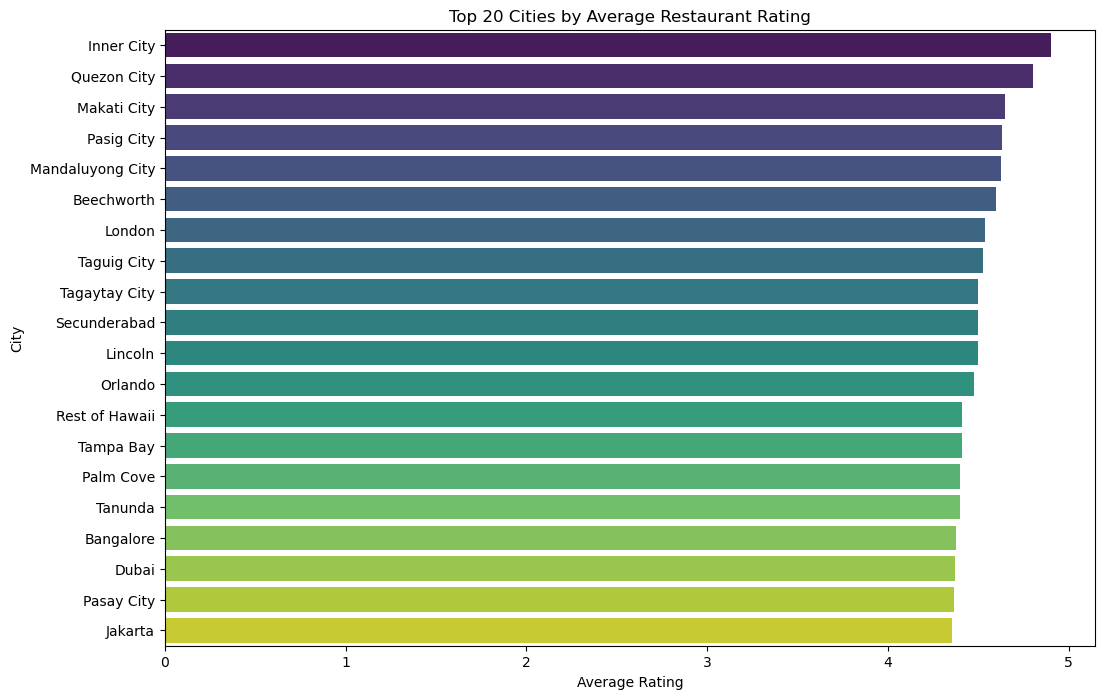

In [20]:
# Plot average rating by city
plt.figure(figsize=(12, 8))
sns.barplot(y=avg_rating_by_city['City'], x=avg_rating_by_city['Rating'], palette='viridis')
plt.title('Top 20 Cities by Average Restaurant Rating')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()

In [24]:
# Calculate average price by city
avg_price_by_city = data.groupby('City')['Average_Cost_for_two'].mean().reset_index()
avg_price_by_city = avg_price_by_city.sort_values(by='Average_Cost_for_two', ascending=False).head(20)




C:\Users\admin\AppData\Local\Temp\ipykernel_5076\4006163729.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_price_by_city['City'], x=avg_price_by_city['Average_Cost_for_two'], palette='viridis')


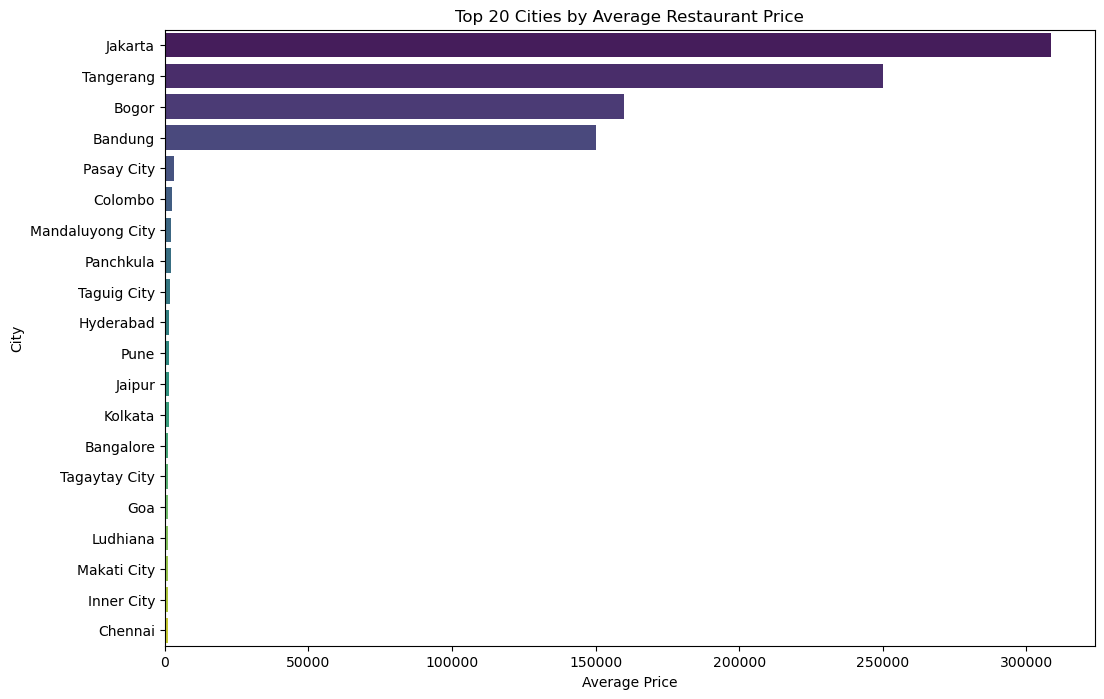

In [26]:
# Plot average price by city
plt.figure(figsize=(12, 8))
sns.barplot(y=avg_price_by_city['City'], x=avg_price_by_city['Average_Cost_for_two'], palette='viridis')
plt.title('Top 20 Cities by Average Restaurant Price')
plt.xlabel('Average Price')
plt.ylabel('City')
plt.show()

In [36]:
# Calculate average rating by cuisine type
avg_rating_by_cuisine = data.groupby('Cuisines')['Rating'].mean().reset_index()
avg_rating_by_cuisine = avg_rating_by_cuisine.sort_values(by='Rating', ascending=False).head(20)




C:\Users\admin\AppData\Local\Temp\ipykernel_5076\3967205694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_rating_by_cuisine['Cuisines'], x=avg_rating_by_cuisine['Rating'], palette='viridis')


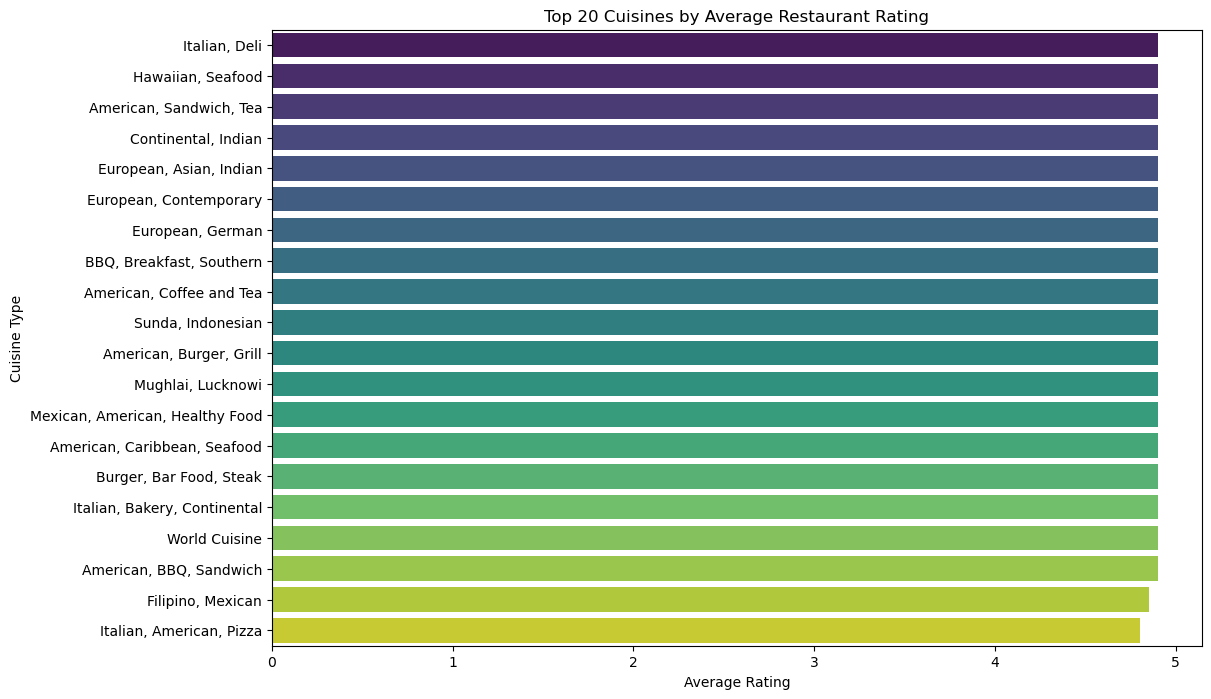

In [38]:
# Plot average rating by cuisine type
plt.figure(figsize=(12, 8))
sns.barplot(y=avg_rating_by_cuisine['Cuisines'], x=avg_rating_by_cuisine['Rating'], palette='viridis')
plt.title('Top 20 Cuisines by Average Restaurant Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.show()


In [39]:
# Calculate average price by cuisine type
avg_price_by_cuisine = data.groupby('Cuisines')['Average_Cost_for_two'].mean().reset_index()
avg_price_by_cuisine = avg_price_by_cuisine.sort_values(by='Average_Cost_for_two', ascending=False).head(20)



C:\Users\admin\AppData\Local\Temp\ipykernel_5076\1751234639.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_price_by_cuisine['Cuisines'], x=avg_price_by_cuisine['Average_Cost_for_two'], palette='viridis')


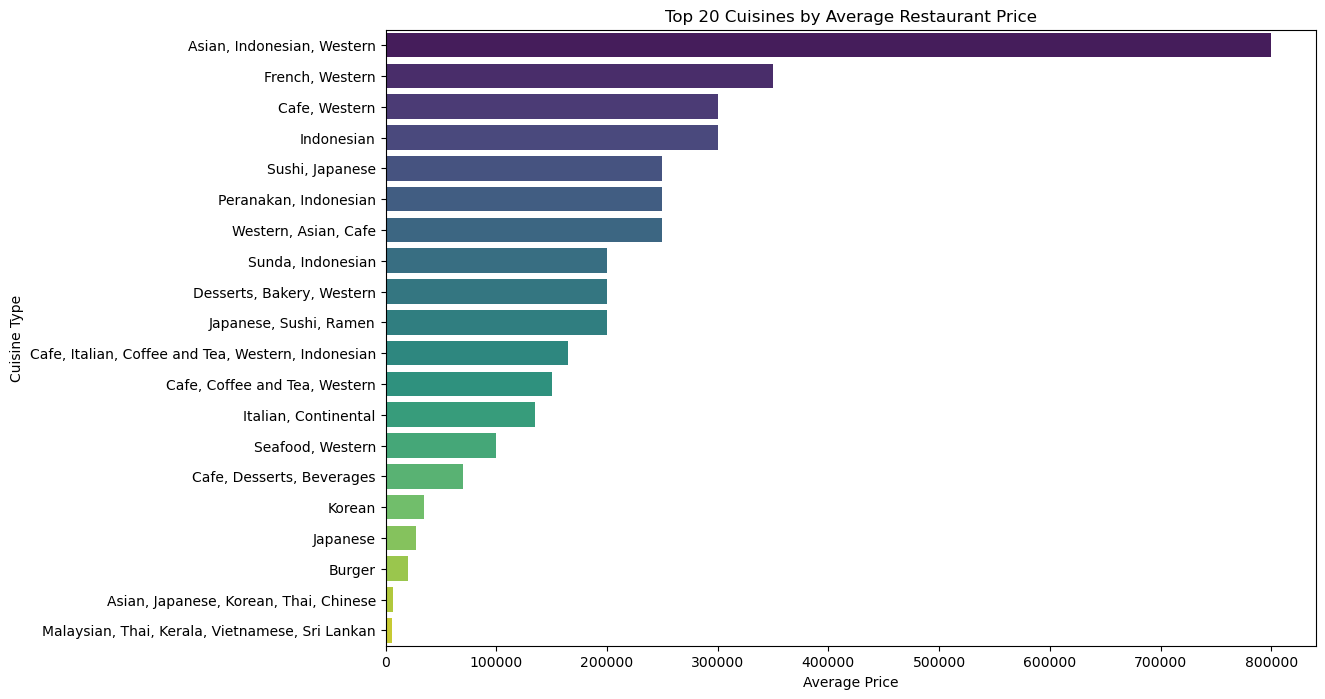

In [42]:
# Plot average price by cuisine type
plt.figure(figsize=(12, 8))
sns.barplot(y=avg_price_by_cuisine['Cuisines'], x=avg_price_by_cuisine['Average_Cost_for_two'], palette='viridis')
plt.title('Top 20 Cuisines by Average Restaurant Price')
plt.xlabel('Average Price')
plt.ylabel('Cuisine Type')
plt.show()
